---
title: "Odoo Report (May 2025)"
author: "Nikhil Pundir (DataActs)"
echo: False
warnings: False
format: 
    html:
        embed-resources: true
        page-layout: full
        theme: cosmo
        side-bar:
            style: floating
            collapse-level: 2
            pinned: true
---

| Section      | Details                                                                               |
|--------------|---------------------------------------------------------------------------------------|
| Tools Used   | GCP(Bigquery, Dataform), Python (Pandas, Matplotlib), SQL, Quarto                     |
| Data Source  | Google Bigquery                                                                       |

### Report Overview
##### This report presents an analysis of data collected from Google BigQuery for the month of May.

##### The main goal of this analysis is to:
* Identify key trends in the data
* Understand the overall performance and patterns
* Gain actionable insights that can support better decision-making



:::{.content-hidden}
### Importing Libraries
:::

In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('odoo.db')
df = pd.read_sql("select * from Sales", conn)
pd.set_option('display.max_columns', None)

:::{.content-hidden}
#### Data Cleaning
:::


In [3]:
df2 = df[df["invoice"].str.startswith("INV")]
df2 = df[df["name"].str.contains("Sales")]
df2["date"] = pd.to_datetime(df2["date"]).dt.date
columns = ["move_id", "sales_rep_id", "write_date","partner_id", "journal_id_name", "ref", "category_id", "warehouse_id", "name", "account_type", "contact_type", "state", "balance"]
cdf = df2.drop(columns=columns)

### Sample Data

In [4]:
import itables
itables.show(cdf.head(50))

Loading ITables v2.4.4 from the internet... (need help?)


## Question Insight Action


### Who are our top 5 customers by revenue in May?

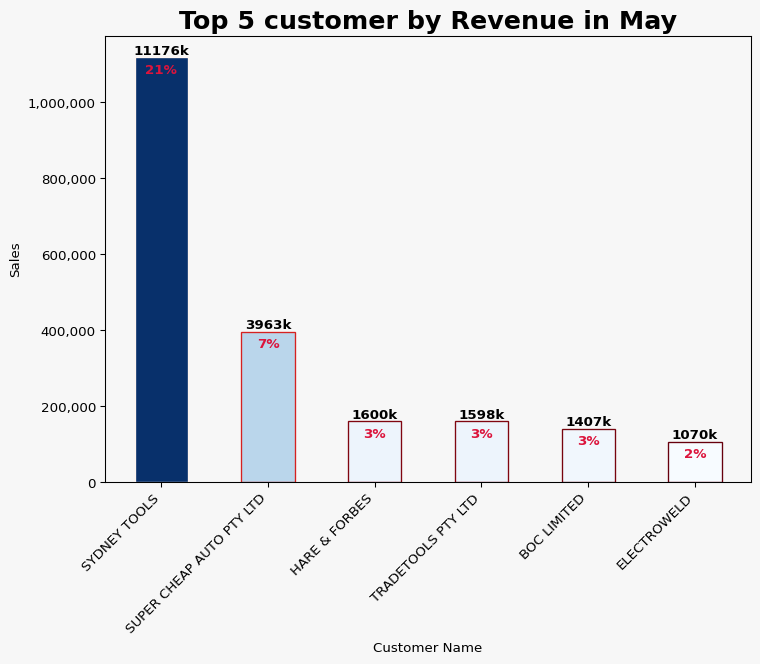

In [5]:
rev = cdf.groupby("partner_id_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(6)
rev["margin"] = rev["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(rev["new_balance"].min(), rev["new_balance"].max())
color = cm.Blues(norm(rev["new_balance"]))
edcolor = cm.Reds_r(norm(rev["new_balance"]))
plt.bar(rev["partner_id_name"], rev["new_balance"], color = color, edgecolor = edcolor, width = 0.5)
plt.title("Top 5 customer by Revenue in May", fontsize = 19, fontweight = "bold")
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(rev["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = rev["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

##### Sydney Tools was the top customer in May with a revenue of 11,176K, contributing 21% of the total monthly revenue. It was followed by Super Cheap Auto Pty Ltd with 3,963K (7% share). Other top customers included Hare & Forbes, Tradetools BOC, and Electroweld.



### Which product are Driving the most revenue ?

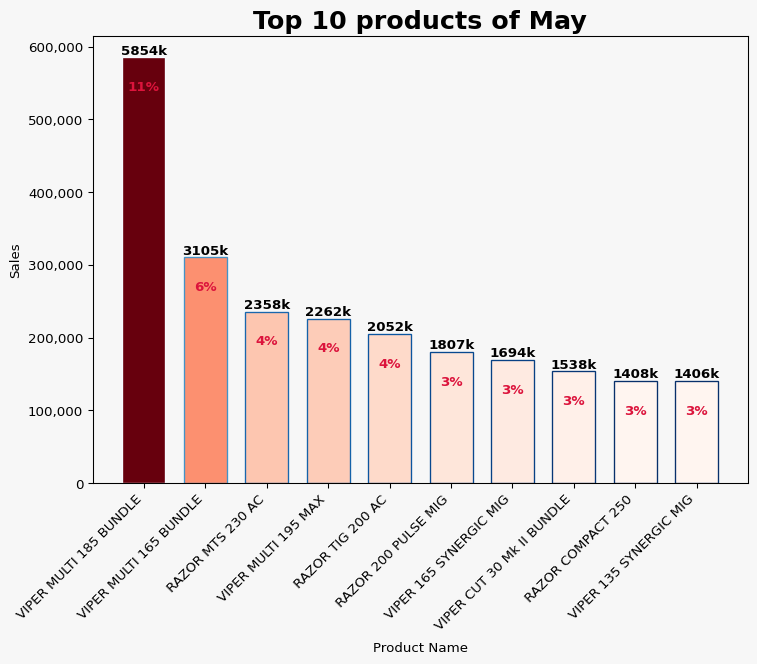

In [6]:
cdf["product_name"] = df["product_name"].str.split(r'/|\[|\]').str[2]
prev = cdf.groupby("product_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(10)
prev["margin"] = prev["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(prev["new_balance"].min(), prev["new_balance"].max())
color = cm.Reds(norm(prev["new_balance"]))
edcolor = cm.Blues_r(norm(prev["new_balance"]))
plt.bar(prev["product_name"], prev["new_balance"], color = color, edgecolor = edcolor, width = 0.7)
plt.title("Top 10 products of May", fontsize = 19, fontweight = "bold")
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(prev["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = prev["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

##### The top 10 products by sales in May were led by the Viper Multi 185 Bundle and Viper Multi 165, generating 5,854K and 3,105K in revenue respectively. These two products alone contributed 11% and 6% of the total monthly sales, making them the highest-selling items for the period

### Which sales rep performed the best?

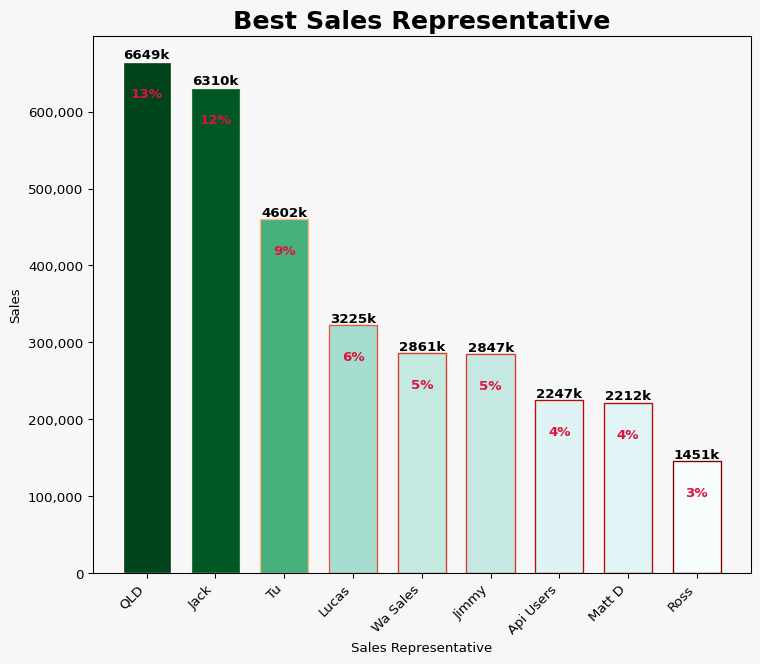

In [7]:

rep = cdf.groupby("sales_rep_name")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False).head(10)
rep = rep[rep["sales_rep_name"] != "Administrator"]
rep["margin"] = rep["new_balance"]/cdf["new_balance"].sum()*100
plt.figure(figsize = (8,7),  facecolor = "#F7F7F7")
plt.gca().set_facecolor("#F7F7F7")
norm = plt.Normalize(rep["new_balance"].min(), rep["new_balance"].max())
color = cm.BuGn(norm(rep["new_balance"]))
edcolor = cm.OrRd_r(norm(rep["new_balance"]))
plt.bar(rep["sales_rep_name"], rep["new_balance"], color = color, edgecolor = edcolor, width = 0.7)
plt.title("Best Sales Representative", fontsize = 19, fontweight = "bold")
plt.xlabel("Sales Representative")
plt.ylabel("Sales")
plt.xticks(rotation = 45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, value in enumerate(rep["new_balance"]):
    plt.text(i, value, f"{round(value/100)}k", color = "black", fontweight = "bold", ha = "center", va = "bottom")
    #margin setup
    margin = rep["margin"].iloc[i]
    plt.text(i, value - 50000, f"{round(margin)}%", color = "crimson", fontweight = "bold", ha="center", va= "bottom")
plt.tight_layout(pad = 1.0)
plt.show()

##### Among sales representatives, QLD and JACK were the top performers after Admin, contributing 13% and 12% of total sales in May respectively.

:::{.content-hidden}
#### Are there many paid invoices?
:::

In [8]:
# upi = df.groupby("payment_state")["new_balance"].sum().reset_index().sort_values(by = "new_balance")
# upi= upi[upi["payment_state"] != "not_paid"]
# plt.figure(figsize = (7,6),  facecolor = "#54C3CF")
# plt.gca().set_facecolor("#F7F7F7")
# explode = [0.3,0,0]
# colors = sns.color_palette("Blues_r", n_colors=4)
# plt.pie(upi["new_balance"], labels=upi["payment_state"], autopct = '%0.2f%%', shadow = True, explode = explode, colors= colors,
#         textprops = {"fontsize": 15}, wedgeprops={"linewidth": 2, "edgecolor": "black"})
# plt.title("Paid Invoices",fontsize = 19, fontweight = "bold", fontfamily = "monospace")
# plt.show()

### Which warehouse fulfilled the most orders?

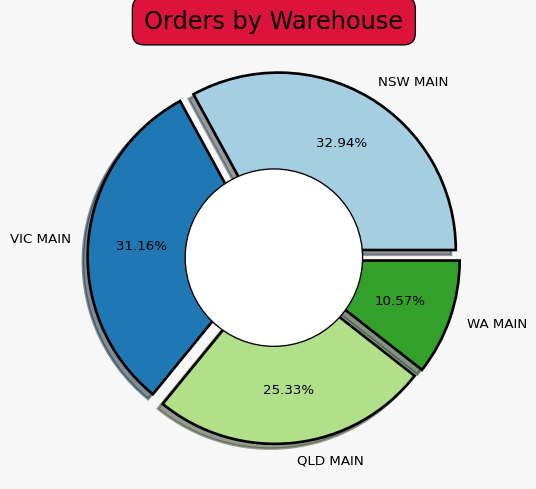

In [9]:
war = cdf.groupby("warehouse_name")["invoice"].count().reset_index().sort_values(by = "invoice", ascending = False)
war = war[war["warehouse_name"] != "NSW 2ND GEAR - ONLINE"]
plt.figure(figsize=(7,6), facecolor = "#F7F7F7")
colors = sns.color_palette("Paired", n_colors=4)
plt.pie(war["invoice"], labels = war["warehouse_name"], autopct="%0.2f%%",pctdistance= 0.7, shadow = True, wedgeprops={"linewidth": 2, "edgecolor": "black"}, explode =[0.05,0.05,0.05,0.05], colors = colors)
#piechart hole
hole = plt.Circle((0,0), 0.5, facecolor = "white", edgecolor = "black")
plt.gcf().gca().add_artist(hole)
plt.title("Orders by Warehouse", fontsize = 18, bbox = dict(facecolor = 'crimson', boxstyle = 'round, pad=0.5'))
plt.show()

##### The majority of orders in May were fulfilled by NSW Main and VIC Main, contributing 32% and 31% respectively. QLD Main followed with 25%, and WA Main accounted for 10%. The lowest contributor was NSW 2nd Gear - Online, which did not make it to the top fulfillment list.

### What are the top 5 highest-value orders from each warehouse?


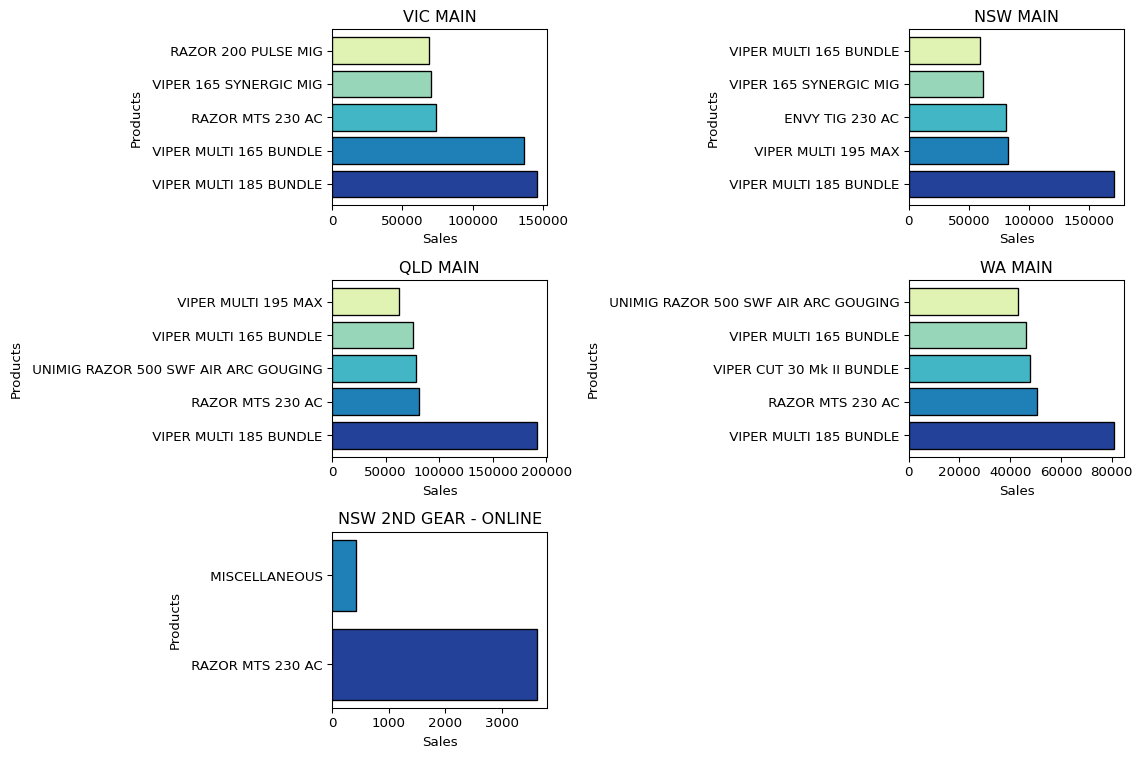

In [10]:
wn = cdf["warehouse_name"].unique()
wn = np.delete(wn, 2)
difc = ["twilight", "hsv","berlin","manivo","RdBu", "Wistia"]
barclr = sns.color_palette("YlGnBu_r", n_colors= 5)
plt.figure(figsize=(12, 8)) 
for ind, i in enumerate(wn):
        temp = cdf[cdf["warehouse_name"] == i]
        hvow = temp.groupby(["warehouse_name","product_name"])["new_balance"].sum().reset_index().sort_values(by = ["warehouse_name", "new_balance"], ascending = [True,False]).head(5)
        plt.subplot(3,2, ind+1)
        plt.barh(hvow["product_name"], hvow["new_balance"], color = barclr, edgecolor = "black" )
        plt.xlabel("Sales")
        plt.ylabel("Products")
        plt.subplots_adjust(top=2, bottom=1)
        plt.title(i)
        plt.tight_layout()
plt.show()


##### The Viper Multi 185 Bundle was the highest-value order across all four main warehouses, making it the top-performing product in terms of order value. The only exception was NSW 2nd Gear - Online, where it didn’t hold the top spot. Among the warehouses, WA Main recorded the highest total sales for the Viper Multi 185 Bundle.
#### In terms of total warehouse sales for May:
* NSW Main led with 1.68M
* Followed by VIC Main with 1.57M
* QLD Main at 1.39M
* WA Main with 795K
* NSW 2nd Gear - Online had the lowest with just 4K

### What is the total revenue vs refunds?

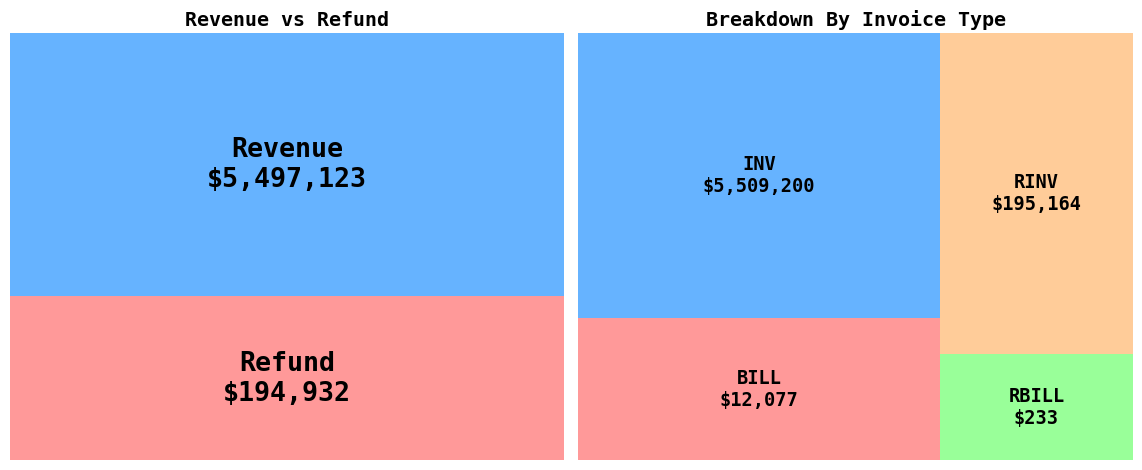

In [12]:
df["invoice_type"] = df["invoice"].str.split('/').str[0]
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
df["category"] = df["invoice_type"].map({
    "INV": "Revenue",
    "BILL": "Revenue",
    "RBILL": "Refund",
    "RINV": "Refund"
})
summary = df.groupby("category")["new_balance"].sum().abs().reset_index()
summary2 = df.groupby("invoice_type")["new_balance"].sum().abs().reset_index()
summary["label"] = summary.apply(lambda x: f"{x['category']}\n${x['new_balance']:,.0f}", axis=1)
summary2["label"] = summary2.apply(lambda x: f"{x['invoice_type']}\n${x['new_balance']:,.0f}", axis = 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
a = [1,1.6]
b = [25,50,10,30]
import squarify
squarify.plot(sizes = a, label = summary["label"], color = colors, text_kwargs = {
    'fontsize': 20,
    'fontweight': "bold",
    'fontfamily':"monospace"
}, ax = axes[0])
axes[0].axis('off')
axes[0].set_title('Revenue vs Refund', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')


squarify.plot(sizes = b, label = summary2["label"], color = colors, text_kwargs = {
    'fontsize': 14,
    'fontweight': "bold",
    'fontfamily':"monospace"    
}, ax = axes[1])
axes[1].axis('off')
axes[1].set_title('Breakdown By Invoice Type',fontsize = 15, fontweight = 'bold', fontfamily= 'monospace')
plt.tight_layout()
plt.show()



##### For May, the total revenue amounted to 5,497K, while the total refunds were 1,949K.
##### This classification was based on invoice types, where "INV" and "BILL" were counted as Revenue, and "RBILL" and "RINV" as Refunds.

### What is the average deal size per location?

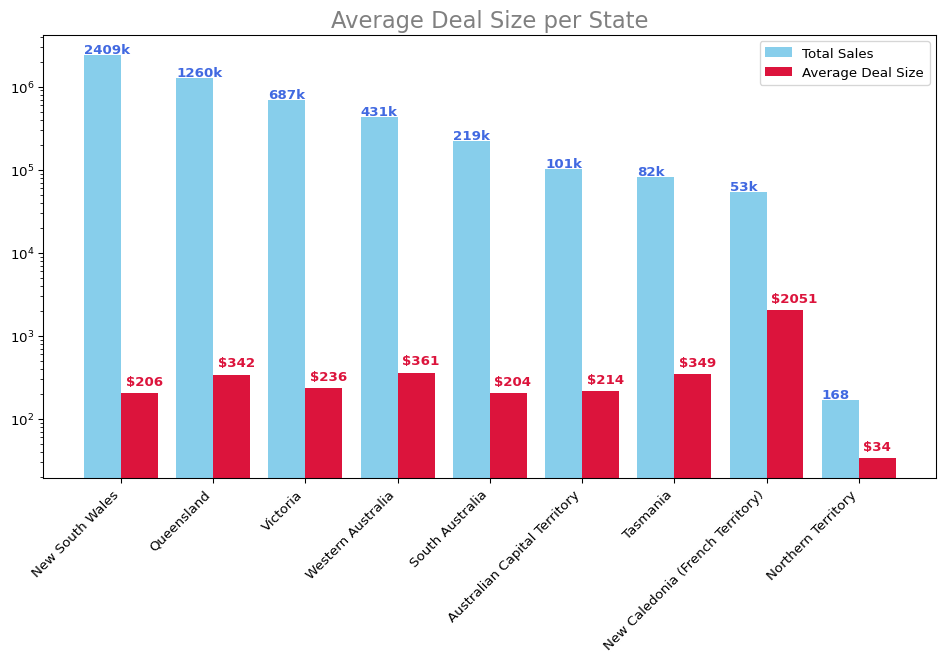

In [13]:
cdf["adlocation"] = cdf["address"].str.split(',').str[2].str.strip()
cdf["adlocation"] = cdf["adlocation"].map({
    'Victoria': 'Victoria',
    'Australian Capital Territory': 'Australian Capital Territory',
    'New South Wales': 'New South Wales',
    'Queensland': 'Queensland',
    'Western Australia': 'Western Australia',
    'South Australia': 'South Australia',
    'Tasmania': 'Tasmania',
    'Northern Territory': 'Northern Territory',
    '2830 DUBBO': 'New South Wales',
    '5253 MURRAY BRIDGE': 'South Australia',
    '2103 MONA VALE': 'New South Wales',
    '2148 NSW': 'New South Wales',
    '4509 QLD': 'Queensland',
    'New Caledonia': 'New Caledonia (French Territory)',
    'Australia': 'Australian Capital Territory',
    np.nan: np.nan
}
)
ads = cdf.groupby("adlocation")["new_balance"].mean().reset_index().sort_values(by = "new_balance", ascending = False)
sds = cdf.groupby("adlocation")["new_balance"].sum().reset_index().sort_values(by = "new_balance", ascending = False)
merge_df = pd.merge(ads, sds, on= "adlocation").sort_values(by = "new_balance_y", ascending= False)
clr = sns.color_palette("Blues_r", n_colors=8)
clr2 = sns.color_palette("Reds_r", n_colors=8)
x = np.arange(len(ads))
y = list(map(lambda xa: xa + 0.4, x))
plt.figure(figsize = (12,6))
plt.bar(x, merge_df["new_balance_y"], color = "skyblue", label = "Total Sales", width=0.4)
plt.bar(y, merge_df["new_balance_x"], color = "crimson", label = "Average Deal Size", width=0.4)
plt.xticks(x + 0.2, merge_df["adlocation"], rotation=45, ha = "right")
plt.yscale("log")
for i,value in enumerate(merge_df["new_balance_y"]):
    lc = merge_df["adlocation"].iloc[i]
    l2 = merge_df["new_balance_x"].iloc[i]
    if lc != "Northern Territory":
        plt.text(i - 0.2, value + (value)*.05, f"{round(value/1000)}k", color = "royalblue", fontweight = "bold")
    else:
        plt.text(i - 0.2, value + (value)*.05, f"{round(value)}", color = "royalblue", fontweight = "bold")
    
    plt.text(i+0.25, l2 + (l2 * 0.25), f"${round(l2)}", color = "crimson", fontweight = "bold")
plt.legend()
plt.title("Average Deal Size per State", fontsize= 17, color = "Grey")
plt.show()


##### The average deal size per state shows how much revenue is generated per transaction in each location. In May, the highest average deal size was in New Caledonia, with 2,051K per deal, despite having one of the lowest total sales (53K), indicating a few high-value transactions.

##### Other notable states include:
* Western Australia: Average deal size of 360K, total sales of 430K
* Queensland: 341K average, 1.25M in total sales
* Tasmania: 348K average, 82K total
* Victoria and New South Wales had lower average deal sizes (235K and 205K, respectively) but contributed the highest overall sales.

### Conclusion
The data tells a clear story: a few top performers are powering most of the results. By focusing on high-value customers, best-selling products, and efficient warehouses, the business can double down on what works—and spot hidden opportunities for growth.